In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Analítica I/Entregas/Talleres/Taller 3 - Datos/precios_pdtos_agricolas.cvs')
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417,0.11,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,n.d.,n.d.,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,n.d.,n.d.,29ago2023,11.121894,-73.885279


In [4]:
# Inicialmente, hay valores que no son numéricos en las columnas de precio y variabilidad
# Entonces, con la siguiente línea de código pretendemos convertir todos los valores n.d.
# en valores faltantes para después tratarlo

df['precio'] = pd.to_numeric(df['precio'], errors='coerce')
df['variabilidad'] = pd.to_numeric(df['variabilidad'], errors='coerce')
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.08,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.06,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,NaN,NaN,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.01,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,NaN,NaN,29ago2023,11.121894,-73.885279


# <font color='056938'> **Identificar datos duplicados**
---

In [9]:
# El código anterior no es muy diciente, aplico un condicional para asegurarme

if df.duplicated().any():
    print("El DataFrame contiene duplicados.")
else:
    print("El DataFrame no contiene duplicados.")


El DataFrame contiene duplicados.


In [6]:
num_duplicados_por_fila = df.duplicated().sum()
num_duplicados_por_fila

13

In [7]:
num_duplicados_por_columna = df.T.duplicated().sum()
num_duplicados_por_columna

0

**Para la base de datos presentada no hay datos duplicados en la filas y columnas**

# <font color='056938'> **Identificar datos faltantes**
---

In [10]:
# se puede ver que hay diferencias entre los datos NO NULOS, lo que indica
# que hay datos faltantes

# Muestra los valores no faltantes y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8855 entries, 0 to 8854
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      8855 non-null   object 
 1   ciudad        8855 non-null   object 
 2   precio        6669 non-null   float64
 3   variabilidad  6526 non-null   float64
 4   fecha         8855 non-null   object 
 5   LATITUD       8050 non-null   float64
 6   LONGITUD      8050 non-null   float64
dtypes: float64(4), object(3)
memory usage: 484.4+ KB


In [8]:
# Como se puede observar, en las variables de 'precio', 'variabilidad', 'LATITUD', 'LATITUD'
# hay datos faltantes, entonces a partir del análisis de cada variable, se hará la imputación
# necesaria según la variable

# Muestra las variables que tienen datos faltantes
df.isnull().any()

producto        False
ciudad          False
precio           True
variabilidad     True
fecha           False
LATITUD          True
LONGITUD         True
dtype: bool

In [11]:
# Indica cuantas variables tienen datos faltantes
df.isnull().sum().sum()

6125

In [12]:
# Imprime los valores faltantes de cada columna
print(df.isnull().sum())

producto           0
ciudad             0
precio          2186
variabilidad    2329
fecha              0
LATITUD          805
LONGITUD         805
dtype: int64


# <font color='056938'> **Imputación de datos faltantes**
---

### <font color='157699'> **Para el precio**

In [13]:
df['precio'] = df['precio'].interpolate(method='linear')
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.08,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.06,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1525.0,NaN,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.01,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1400.0,NaN,29ago2023,11.121894,-73.885279


### <font color='157699'> **Para la variabilidad**

In [14]:
df['variabilidad'] = df['variabilidad'].interpolate(method='linear')
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.100,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.110,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.080,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.030,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.110,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.060,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1525.0,0.035,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.010,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1400.0,0.010,29ago2023,11.121894,-73.885279


In [15]:
# Confirmo que ya se interpolaron los datos de las variables
print(df.isnull().sum())

producto          0
ciudad            0
precio            0
variabilidad      0
fecha             0
LATITUD         805
LONGITUD        805
dtype: int64


### <font color='157699'> **Para la Latitud & Longitud**

In [16]:
df[['ciudad', 'LATITUD', 'LONGITUD']]

,ciudad,LATITUD,LONGITUD
0,armenia,4.499501,-75.724900
1,bogotá,4.316108,-74.181073
2,bucaramanga,7.155834,-73.111570
3,cali,3.399044,-76.576493
4,cúcuta,NaN,NaN
...,...,...,...
8850,medellín,6.257590,-75.611031
8851,neiva,2.993360,-75.272362
8852,pereira,4.803663,-75.795791
8853,santa marta,11.121894,-73.885279


In [17]:
cucuta = df[df['ciudad'] == 'cúcuta']
cucuta

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
4,Arveja verde en vaina,cúcuta,9417.000000,0.110000,01ago2023,NaN,NaN
15,Cebolla cabezona blanca,cúcuta,1958.000000,-0.150000,01ago2023,NaN,NaN
26,Cebolla junca,cúcuta,1341.000000,0.340000,01ago2023,NaN,NaN
37,Chócolo mazorca,cúcuta,1364.000000,0.250000,01ago2023,NaN,NaN
48,Fríjol verde*,cúcuta,3100.000000,-0.095000,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8804,Papa negra*,cúcuta,1400.000000,0.013333,29ago2023,NaN,NaN
8815,Papa criolla,cúcuta,2883.000000,0.060000,29ago2023,NaN,NaN
8826,Plátano guineo,cúcuta,1778.571429,0.002857,29ago2023,NaN,NaN
8837,Plátano hartón verde,cúcuta,2758.000000,0.000000,29ago2023,NaN,NaN


In [18]:
print(cucuta.isnull().sum())

producto          0
ciudad            0
precio            0
variabilidad      0
fecha             0
LATITUD         455
LONGITUD        455
dtype: int64


In [19]:
# Se define los valores de LATITUD y LONGITUD que se desean asignar a la ciudad 'Cúcuta'
latitud_cucuta = 7.8939100
longitud_cucuta = -72.5078200

# Utiliza fillna para reemplazar los valores faltantes en 'LATITUD' y 'LONGITUD' para la ciudad 'Cúcuta'
df.loc[df['ciudad'] == 'cúcuta', 'LATITUD'] = df.loc[df['ciudad'] == 'cúcuta', 'LATITUD'].fillna(latitud_cucuta)
df.loc[df['ciudad'] == 'cúcuta', 'LONGITUD'] = df.loc[df['ciudad'] == 'cúcuta', 'LONGITUD'].fillna(longitud_cucuta)

df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.100,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.110,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.080,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.030,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.110,01ago2023,7.893910,-72.507820
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.060,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1525.0,0.035,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.010,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1400.0,0.010,29ago2023,11.121894,-73.885279


In [20]:
print(df.isnull().sum())

producto          0
ciudad            0
precio            0
variabilidad      0
fecha             0
LATITUD         350
LONGITUD        350
dtype: int64


In [21]:
# Supongamos que tienes un DataFrame llamado df con las columnas 'ciudad', 'LATITUD' y 'LONGITUD'

# Filtra las filas donde 'LATITUD' y 'LONGITUD' son valores nulos (NaN)
ciudades_faltantes = df[df['LATITUD'].isna() | df['LONGITUD'].isna()]

# Ahora, 'ciudades_faltantes' contiene todas las filas con valores faltantes en 'LATITUD' o 'LONGITUD'
ciudades_faltantes

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
387,Arveja verde en vaina,cartagena,7412.5,0.060000,02ago2023,NaN,NaN
399,Cebolla cabezona blanca,cartagena,2250.0,-0.020000,02ago2023,NaN,NaN
411,Cebolla junca,cartagena,2934.5,0.055000,02ago2023,NaN,NaN
423,Chócolo mazorca,cartagena,656.0,-0.190000,02ago2023,NaN,NaN
435,Fríjol verde*,cartagena,3400.0,-0.035000,02ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8404,Papa negra*,cartagena,1480.0,0.010000,28ago2023,NaN,NaN
8418,Papa criolla,cartagena,4300.0,-0.030000,28ago2023,NaN,NaN
8432,Plátano guineo,cartagena,1550.0,-0.042857,28ago2023,NaN,NaN
8446,Plátano hartón verde,cartagena,2700.0,-0.090000,28ago2023,NaN,NaN


In [22]:
# Supongamos que tienes un DataFrame llamado df con las columnas 'ciudad', 'LATITUD' y 'LONGITUD'

# Define los valores de LATITUD y LONGITUD que deseas asignar a la ciudad 'Cúcuta'
latitud_cartagena = 10.3997200
longitud_cartagena = -75.5144400

# Utiliza fillna para reemplazar los valores faltantes en 'LATITUD' y 'LONGITUD' para la ciudad 'Cúcuta'
df.loc[df['ciudad'] == 'cartagena', 'LATITUD'] = df.loc[df['ciudad'] == 'cartagena', 'LATITUD'].fillna(latitud_cucuta)
df.loc[df['ciudad'] == 'cartagena', 'LONGITUD'] = df.loc[df['ciudad'] == 'cartagena', 'LONGITUD'].fillna(longitud_cucuta)

df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.100,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.110,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.080,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.030,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.110,01ago2023,7.893910,-72.507820
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.060,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1525.0,0.035,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.010,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1400.0,0.010,29ago2023,11.121894,-73.885279


In [23]:
print(df.isnull().sum())

producto        0
ciudad          0
precio          0
variabilidad    0
fecha           0
LATITUD         0
LONGITUD        0
dtype: int64


# <font color='056938'> **OUTLIERS**
---

## <font color='157699'> **Resumen** </font>

In [24]:
# Usar la función describe para identificar diferencias entre las medidas descriptivas
df['precio'].describe()

count     8855.000000
mean      3250.644551
std       1975.508192
min        339.000000
25%       1750.750000
50%       2839.000000
75%       4000.000000
max      10000.000000
Name: precio, dtype: float64

## <font color='157699'> **Histograma** </font>

Text(0, 0.5, 'Número de productos')

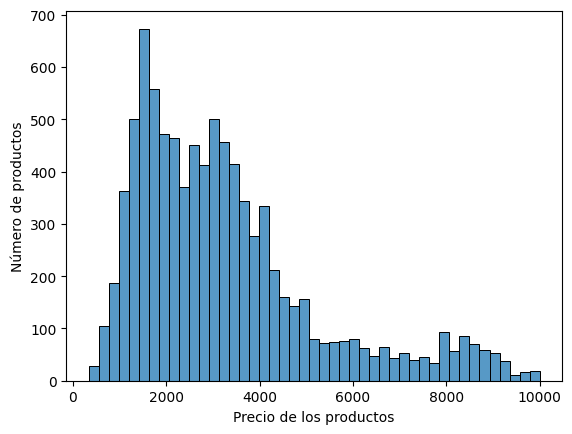

In [25]:
import seaborn as sns

# este histograma tiene en cuenta todos los precios de todos los productos de todas las ciudades.
# No tiene sentido identificar outliers a parrir de este gráfico.
# Crear un histograma usando Seaborn
fig = sns.histplot(data = df, x = 'precio')

# Adicionar nombres a ejes
fig.set_xlabel('Precio de los productos')
fig.set_ylabel('Número de productos')

## <font color='157699'> **Boxplot** </font>

Text(0.5, 0, 'Precio de los productos')

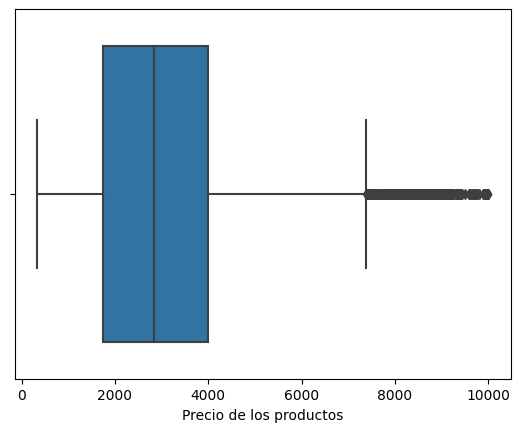

In [26]:
# Del mismo modo que en el histograma, no s epueden sacar conclusiones a partir de este boxplot.

# Crear un boxplot
fig = sns.boxplot(data = df, x = 'precio')

# Adicionar el título
fig.set_xlabel('Precio de los productos')

In [27]:
# Por todo lo anterior, se busca segmentar el análisis para un solo producto y por cada ciudad para ver el comportamiento de los datos atípicos

df.producto.unique()

array(['Arveja verde en vaina', 'Cebolla cabezona blanca',
       'Cebolla junca', 'Chócolo mazorca', 'Fríjol verde*', 'Habichuela',
       'Lechuga batavia', 'Pepino cohombro', 'Pimentón', 'Remolacha',
       'Tomate*', 'Zanahoria', 'Aguacate*', 'Banano*', 'Coco',
       'Granadilla', 'Guayaba*', 'Limón común', 'Limón Tahití', 'Lulo',
       'Mandarina*', 'Mango tommy', 'Manzana royal gala', 'Maracuyá',
       'Mora de Castilla', 'Naranja*', 'Papaya maradol', 'Piña *',
       'Tomate de árbol', 'Arracacha*', 'Papa negra*', 'Papa criolla',
       'Plátano guineo', 'Plátano hartón verde', 'Yuca*', 'Aguacate *',
       'Papa  criolla'], dtype=object)

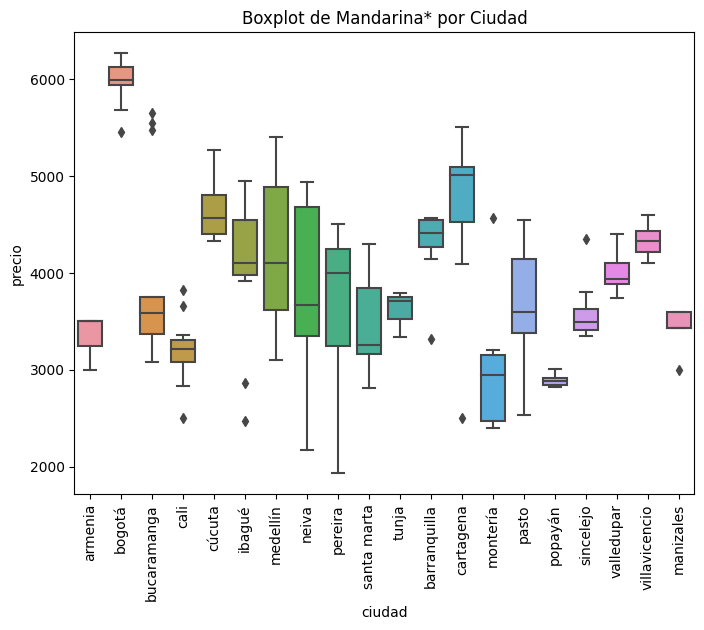

In [28]:
# En ese sentido, selecciono el precio de la mandarina en la ciudad de Bucaramanga
# porque es el boxplot que mayor variabildiad presenta en sí mismo

producto_seleccionado = 'Mandarina*'
df_producto = df[df['producto'] == producto_seleccionado]

# Crea el gráfico de boxplot para el producto seleccionado.
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='ciudad', y='precio', data=df_producto)
#fig.set(ylim=(0, 7000))
plt.title(f'Boxplot de {producto_seleccionado} por Ciudad')
plt.xticks(rotation=90)
plt.show()

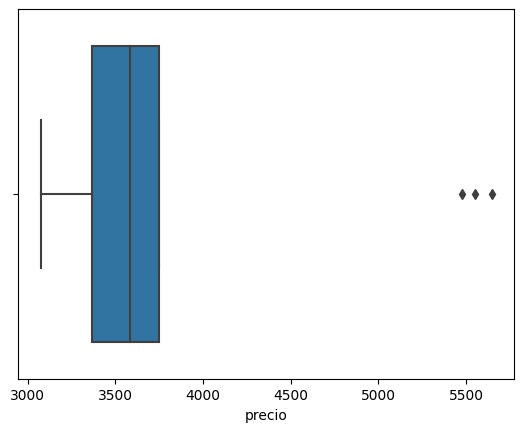

In [29]:
# Filtro el df para el producto 'Mandarina' y la ciudad 'Bucaramanga'.
producto_seleccionado = 'Mandarina*'
ciudad_seleccionada = 'bucaramanga'
df_filtrado = df[(df['producto'] == producto_seleccionado)&(df['ciudad'] == ciudad_seleccionada)]

# Gráfico de boxplot para el producto y la ciudad seleccionados.
sns.boxplot(data = df_filtrado, x = 'precio')
plt.show()

In [30]:
df_filtrado

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
222,Mandarina*,bucaramanga,3315.000000,0.000000,01ago2023,7.155834,-73.11157
1087,Mandarina*,bucaramanga,3370.000000,0.020000,03ago2023,7.155834,-73.11157
1617,Mandarina*,bucaramanga,5646.000000,0.000000,04ago2023,7.155834,-73.11157
2097,Mandarina*,bucaramanga,3370.000000,0.000000,08ago2023,7.155834,-73.11157
2977,Mandarina*,bucaramanga,3750.000000,0.110000,10ago2023,7.155834,-73.11157
3507,Mandarina*,bucaramanga,5551.666667,-0.013333,11ago2023,7.155834,-73.11157
4457,Mandarina*,bucaramanga,3587.000000,-0.040000,15ago2023,7.155834,-73.11157
5322,Mandarina*,bucaramanga,3587.000000,0.000000,17ago2023,7.155834,-73.11157
5852,Mandarina*,bucaramanga,3587.000000,0.000000,18ago2023,7.155834,-73.11157
6332,Mandarina*,bucaramanga,3587.000000,0.000000,22ago2023,7.155834,-73.11157


## <font color='157699'> **Z-Score Modificado** </font>

In [31]:
# Importar libreria numpy
import numpy as np

# Importar la función median_abs_deviation
from scipy.stats import median_abs_deviation

# Obtener el valor MAD
mad_score = median_abs_deviation(df_filtrado['precio'])
mediana = df_filtrado['precio'].median()
m_abs = np.abs(0.6745*(df_filtrado['precio']-mediana)/mad_score)

# Obtener outliers
outliers_zscore_mad = df_filtrado[m_abs > 3.5]
outliers_zscore_mad

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
1617,Mandarina*,bucaramanga,5646.000000,0.000000,04ago2023,7.155834,-73.11157
3507,Mandarina*,bucaramanga,5551.666667,-0.013333,11ago2023,7.155834,-73.11157
7742,Mandarina*,bucaramanga,5475.666667,-0.013333,25ago2023,7.155834,-73.11157


## <font color='157699'> **Eliminación de outliers** </font>

In [32]:
# Se eliminaran los outliers que se identifican con el método del z-score modificado

# Importar libreria numpy
import numpy as np

# Importar la función median_abs_deviation
from scipy.stats import median_abs_deviation

# Obtener el valor MAD
mad_score = median_abs_deviation(df_filtrado['precio'])
mediana = df_filtrado['precio'].median()
m = 0.6745*(df_filtrado['precio']-mediana)/mad_score
m_abs = np.abs(m)

# Se dejan las filas con z-score modificado menor o igual que el valor absoluto de 3.5
precios_sin_outlier = df_filtrado[m_abs <= 3.5]
precios_sin_outlier

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
222,Mandarina*,bucaramanga,3315.0,0.00,01ago2023,7.155834,-73.11157
1087,Mandarina*,bucaramanga,3370.0,0.02,03ago2023,7.155834,-73.11157
2097,Mandarina*,bucaramanga,3370.0,0.00,08ago2023,7.155834,-73.11157
2977,Mandarina*,bucaramanga,3750.0,0.11,10ago2023,7.155834,-73.11157
4457,Mandarina*,bucaramanga,3587.0,-0.04,15ago2023,7.155834,-73.11157
5322,Mandarina*,bucaramanga,3587.0,0.00,17ago2023,7.155834,-73.11157
5852,Mandarina*,bucaramanga,3587.0,0.00,18ago2023,7.155834,-73.11157
6332,Mandarina*,bucaramanga,3587.0,0.00,22ago2023,7.155834,-73.11157
7212,Mandarina*,bucaramanga,3315.0,-0.08,24ago2023,7.155834,-73.11157
8692,Mandarina*,bucaramanga,3076.0,-0.01,29ago2023,7.155834,-73.11157


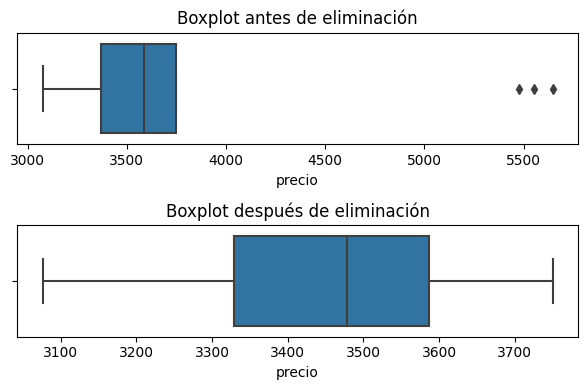

In [33]:
# Importar librerias seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un marco grafico 2x1
fig, axes = plt.subplots(2, 1, figsize = (6, 4))

# Crear una boxplot antes y después de la eliminación
sns.boxplot(data = df_filtrado, x = 'precio', ax = axes[0])
sns.boxplot(data = precios_sin_outlier, x = 'precio', ax = axes[1])

# Adicionar nombres
axes[0].set_title('Boxplot antes de eliminación')
axes[1].set_title('Boxplot después de eliminación')

plt.tight_layout()

## <font color='157699'> **Imputación de outliers** </font>

In [34]:
# Imputación de outliers con la mediana

# Calcular la mediana
mediana = df_filtrado['precio'].median()

# Imputar outliers ecnontrados con z-score modificado con la mediana
precio_imputado = df_filtrado.copy()
precio_imputado.loc[outliers_zscore_mad.index, 'precio'] = mediana
precio_imputado

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
222,Mandarina*,bucaramanga,3315.0,0.000000,01ago2023,7.155834,-73.11157
1087,Mandarina*,bucaramanga,3370.0,0.020000,03ago2023,7.155834,-73.11157
1617,Mandarina*,bucaramanga,3587.0,0.000000,04ago2023,7.155834,-73.11157
2097,Mandarina*,bucaramanga,3370.0,0.000000,08ago2023,7.155834,-73.11157
2977,Mandarina*,bucaramanga,3750.0,0.110000,10ago2023,7.155834,-73.11157
3507,Mandarina*,bucaramanga,3587.0,-0.013333,11ago2023,7.155834,-73.11157
4457,Mandarina*,bucaramanga,3587.0,-0.040000,15ago2023,7.155834,-73.11157
5322,Mandarina*,bucaramanga,3587.0,0.000000,17ago2023,7.155834,-73.11157
5852,Mandarina*,bucaramanga,3587.0,0.000000,18ago2023,7.155834,-73.11157
6332,Mandarina*,bucaramanga,3587.0,0.000000,22ago2023,7.155834,-73.11157


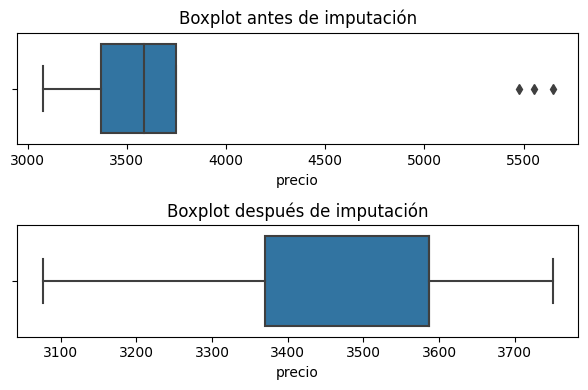

In [35]:
# Importar librerias seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un marco grafico 2x1
fig, axes = plt.subplots(2, 1, figsize = (6, 4))

# Crear una boxplot antes y después de la imputación
sns.boxplot(data = df_filtrado, x = 'precio', ax = axes[0])
sns.boxplot(data = precio_imputado, x = 'precio', ax = axes[1])

# Adicionar nombres
axes[0].set_title('Boxplot antes de imputación')
axes[1].set_title('Boxplot después de imputación')

plt.tight_layout()

# <font color='056938'> **CATEGORIZACIÓN**
---

In [65]:
import math

# Definir los limites de los intervalos y nombres de categorias
valores = [-math.inf, 3076, 5646, math.inf]
categorias = ['Bajo', 'Medio', 'Alto']

# Obtener las categorias
df['costo'] = pd.cut(df['precio'], bins = valores, labels = categorias)
df.head(20)

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,gamma,costo
0,Arveja verde en vaina,armenia,7200.0,0.100000,01ago2023,4.499501,-75.724900,Alta,Alto
1,Arveja verde en vaina,bogotá,7925.0,0.110000,01ago2023,4.316108,-74.181073,Alta,Alto
2,Arveja verde en vaina,bucaramanga,6860.0,0.080000,01ago2023,7.155834,-73.111570,Alta,Alto
3,Arveja verde en vaina,cali,7733.0,-0.030000,01ago2023,3.399044,-76.576493,Alta,Alto
4,Arveja verde en vaina,cúcuta,9417.0,0.110000,01ago2023,7.893910,-72.507820,Alta,Alto
5,Arveja verde en vaina,ibagué,6000.0,-0.010000,01ago2023,4.451921,-75.252591,Alta,Alto
6,Arveja verde en vaina,medellín,5950.0,-0.065000,01ago2023,6.257590,-75.611031,Alta,Alto
7,Arveja verde en vaina,neiva,5653.0,-0.120000,01ago2023,2.993360,-75.272362,Alta,Alto
8,Arveja verde en vaina,pereira,7200.0,-0.086667,01ago2023,4.803663,-75.795791,Alta,Alto
9,Arveja verde en vaina,santa marta,6975.0,-0.053333,01ago2023,11.121894,-73.885279,Alta,Alto


In [68]:
# Supongamos que tienes un DataFrame llamado 'df' y deseas eliminar la columna 'gamma'.
columna_a_eliminar = 'gamma'

# Utiliza el método drop para eliminar la columna.
df = df.drop(columna_a_eliminar, axis=1)


# <font color='056938'> **FILTRADO**
---

**•	¿Cuál es la variabilidad de precios para un producto específico en diferentes ciudades?**

In [66]:
producto_seleccionado = 'Yuca*'
df_producto = df[df['producto'] == producto_seleccionado]
variabilidad_por_ciudad = df_producto.groupby('ciudad')['precio'].std()

variabilidad_por_ciudad

ciudad
armenia            82.152851
barranquilla      111.294604
bogotá            107.760673
bucaramanga       174.318894
cali              290.661409
cartagena         121.345238
cúcuta             95.943693
ibagué             70.366144
manizales           0.000000
medellín          105.452242
montería          139.611365
neiva             105.936616
pasto              65.417560
pereira            39.382587
popayán            60.144733
santa marta      1448.914824
sincelejo         125.125892
tunja            2836.096485
valledupar         42.395099
villavicencio      85.961296
Name: precio, dtype: float64

**•	¿Cuál es la ciudad con el precio promedio más alto para un producto en particular?**

In [42]:
producto_seleccionado = 'Yuca*'
df_producto = df[df['producto'] == producto_seleccionado]
ciudad_con_precio_alto = df_producto.groupby('ciudad')['precio'].mean().idxmax()

ciudad_con_precio_alto

'tunja'

**•	¿Cómo varían los precios de un producto a lo largo del tiempo?**

In [46]:
producto_seleccionado = 'Yuca*'
df_producto = df[df['producto'] == producto_seleccionado]
variacion_temporal = df_producto.groupby('fecha')['precio'].mean()

variacion_temporal

fecha
01ago2023    2617.772727
02ago2023    1661.375000
03ago2023    2425.178571
04ago2023    1750.093750
08ago2023    2603.958333
09ago2023    1586.750000
10ago2023    2450.750000
11ago2023    1748.937500
14ago2023    1631.142857
15ago2023    2649.136364
16ago2023    1563.125000
17ago2023    2437.821429
18ago2023    1692.062500
22ago2023    2613.250000
23ago2023    1512.125000
24ago2023    2451.428571
25ago2023    1634.906250
28ago2023    1553.285714
29ago2023    1930.909091
Name: precio, dtype: float64

**•	¿Cuál es el producto más caro en promedio en todas las ciudades?**

In [49]:
producto_mas_caro = df.groupby('producto')['precio'].mean().idxmax()

producto_mas_caro

'Manzana royal gala'

**•	¿Cuál es la ciudad con la mayor variabilidad de precios en general?**

In [50]:
ciudad_con_mayor_variabilidad = df.groupby('ciudad')['precio'].std().idxmax()

ciudad_con_mayor_variabilidad

'barranquilla'

# <font color='056938'> **GRÁFICOS**
---

In [69]:
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,costo
0,Arveja verde en vaina,armenia,7200.0,0.100,01ago2023,4.499501,-75.724900,Alto
1,Arveja verde en vaina,bogotá,7925.0,0.110,01ago2023,4.316108,-74.181073,Alto
2,Arveja verde en vaina,bucaramanga,6860.0,0.080,01ago2023,7.155834,-73.111570,Alto
3,Arveja verde en vaina,cali,7733.0,-0.030,01ago2023,3.399044,-76.576493,Alto
4,Arveja verde en vaina,cúcuta,9417.0,0.110,01ago2023,7.893910,-72.507820,Alto
...,...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.060,29ago2023,6.257590,-75.611031,Bajo
8851,Yuca*,neiva,1525.0,0.035,29ago2023,2.993360,-75.272362,Bajo
8852,Yuca*,pereira,1400.0,0.010,29ago2023,4.803663,-75.795791,Bajo
8853,Yuca*,santa marta,1400.0,0.010,29ago2023,11.121894,-73.885279,Bajo


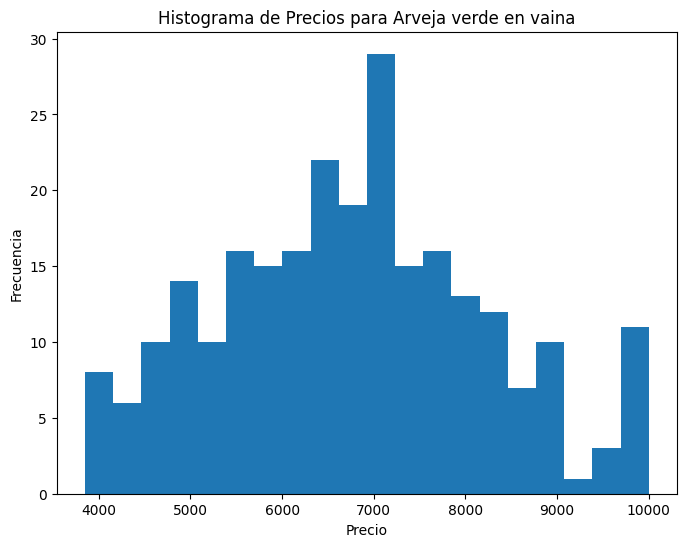

In [76]:
import matplotlib.pyplot as plt

producto_seleccionado = 'Arveja verde en vaina'
precios_producto = df[df['producto'] == producto_seleccionado]['precio']

plt.figure(figsize=(8, 6))
plt.hist(precios_producto, bins=20)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title(f'Histograma de Precios para {producto_seleccionado}')
plt.show()


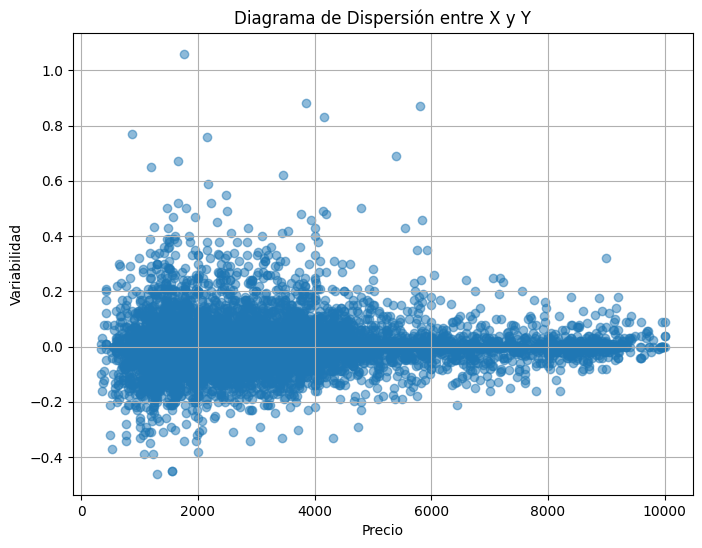

In [75]:
import matplotlib.pyplot as plt

x = df['precio']
y = df['variabilidad']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Variabilidad')
plt.title('Diagrama de Dispersión entre X y Y')
plt.grid(True)

plt.show()
